# Import all the required libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Load the data from CSV file named Social_Network_Ads

In [38]:
file_path = "/Volumes/Code/SocialNetworkAds/Data/Social_Network_Ads.csv"
df = pd.read_csv(file_path)


Display first few cells

In [39]:
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


Basic Understanding of Data

In [40]:
print(f"Dataset info:\n {df.info()}")
print(f"Summary stats:\n {df.describe()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
Dataset info:
 None
Summary stats:
             User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max   


Dropping User ID feature

In [41]:
df = df.drop(df.columns[0], axis=1)

Encoding 'Gender' Feature

In [42]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0}).astype(int)

/var/folders/n3/ykw_ym116c5cp4vy5m41t3vw0000gn/T/ipykernel_7368/1241576237.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0}).astype(int)


Handling missing values

In [43]:
missing_values = df.isnull().sum()
print(f"Total missing values:\n{missing_values}")

Total missing values:
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64



Handling Outliers
Show the number of rows before outlier removal

In [44]:
print(f"Number of rows before outlier removal: {len(df)}")

Number of rows before outlier removal: 400


Define a function to remove outliers based on z-score

In [45]:
def remove_outliers(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    return df[z_scores < threshold]

Remove outliers from 'EstimatedSalary' and 'Age'

In [46]:
df = remove_outliers(df, 'EstimatedSalary')
df = remove_outliers(df, 'Age')

Show the number of rows after outlier removal

In [47]:
print(f"Number of rows after outlier removal: {len(df)}")

Number of rows after outlier removal: 400


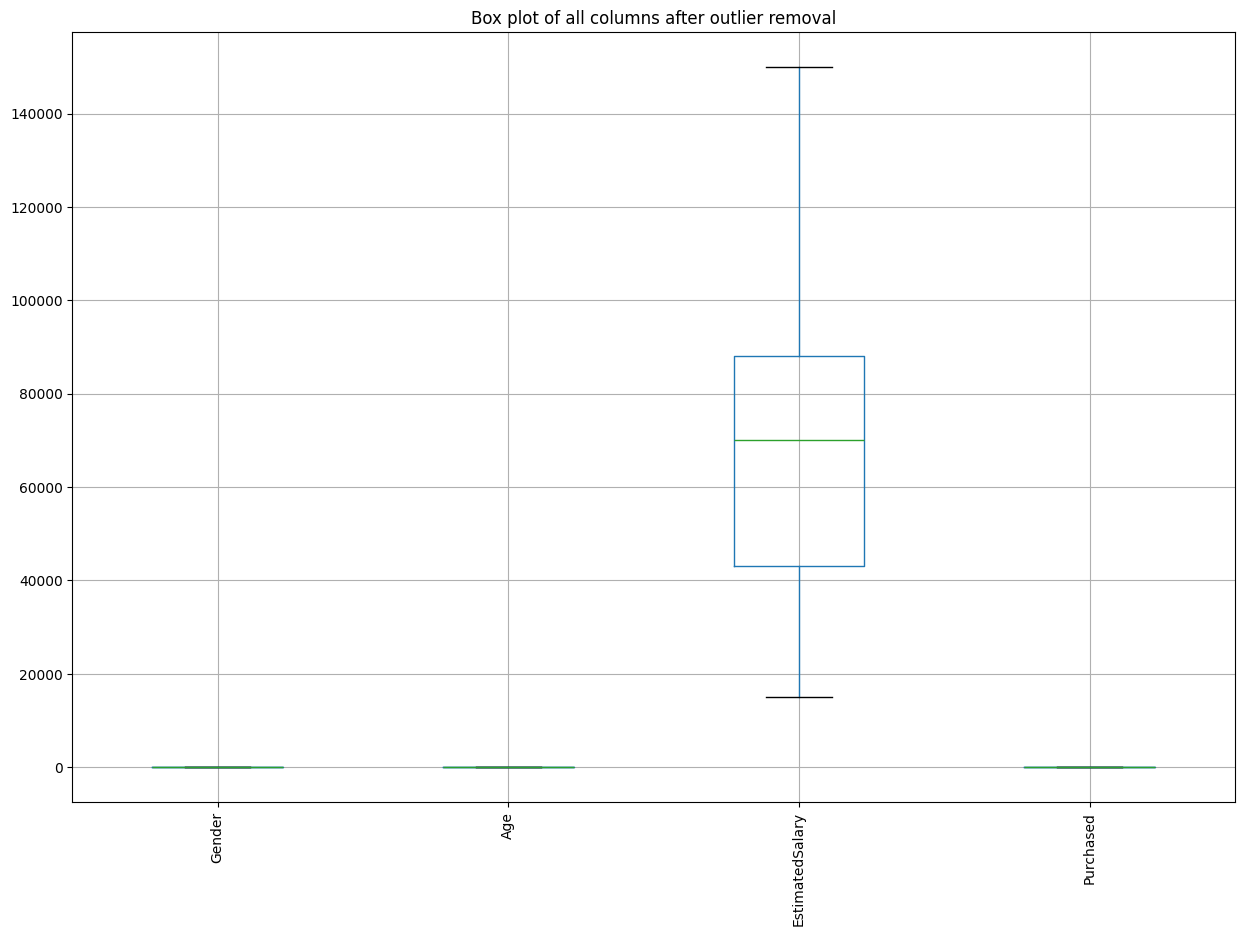

In [48]:
plt.figure(figsize=(15,10))
df.boxplot()
plt.xticks(rotation=90)
plt.title('Box plot of all columns after outlier removal')
plt.show()

Adding age-salary interaction feature

In [49]:
df['Age_Salary_Interaction'] = df['Age'] * df['EstimatedSalary']

Define bin edges and labels

In [50]:
bins = [10,20, 30, 40, 50, 60, 70, 80]
labels = ['11-20','21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

Apply binning

In [51]:
df['Age_bin'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

Reorder columns to place 'Age_Salary_Interaction' before 'Purchased'

In [52]:
columns = [col for col in df.columns if col not in ['Purchased', 'Age_Salary_Interaction']]
columns = columns + ['Age_Salary_Interaction', 'Purchased']
df = df[columns]

Plotting binned data

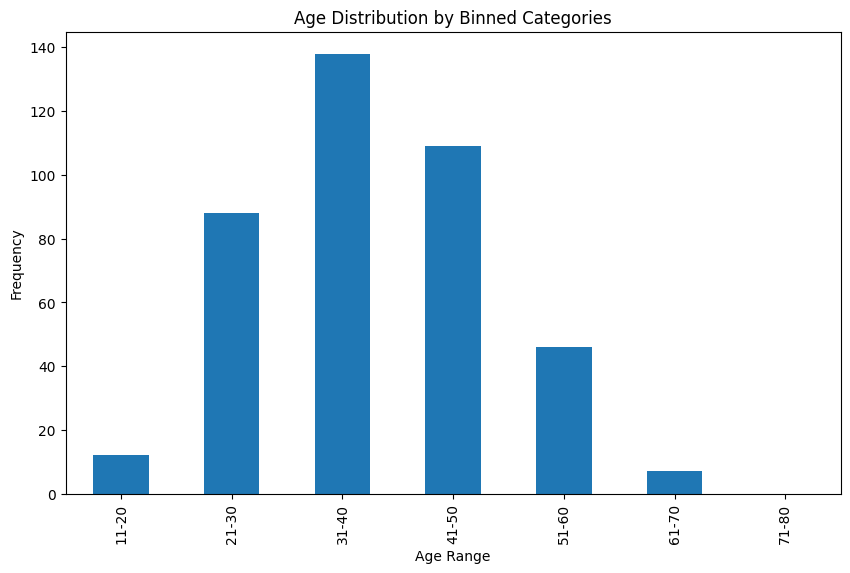

In [53]:
plt.figure(figsize=(10,6))
df['Age_bin'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.title('Age Distribution by Binned Categories')
plt.show()

Analyzing variables using correlation matrix
Select only numeric columns for correlation matrix

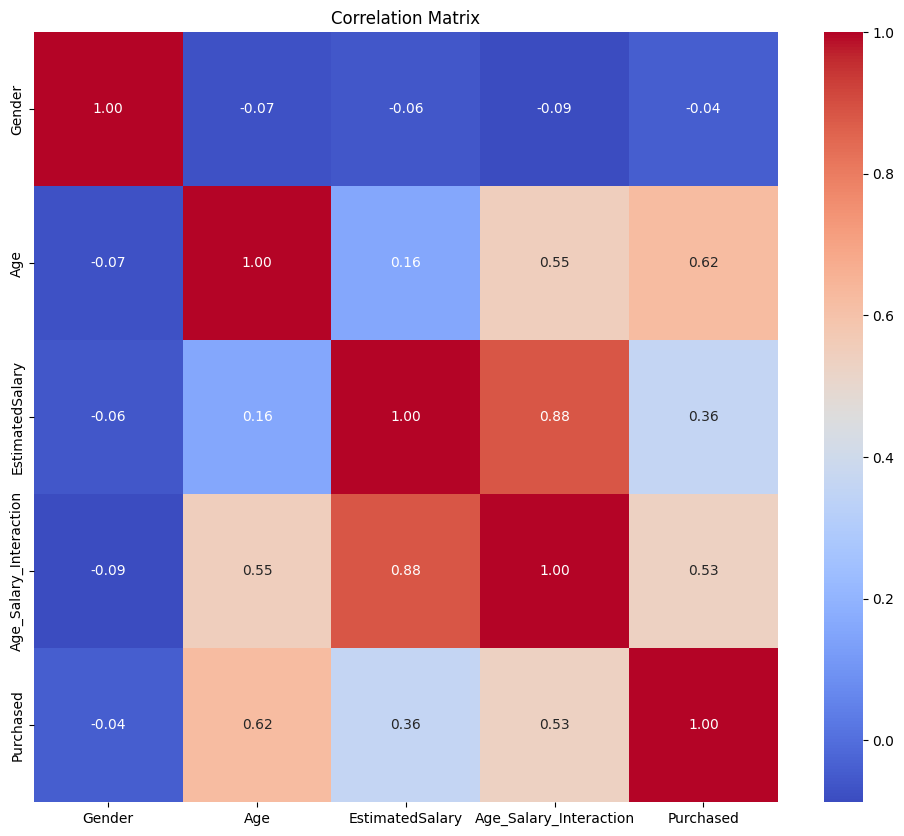

In [54]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr() 
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.yticks(rotation=90)
plt.title('Correlation Matrix')
plt.show()

# Plotting Violin Plots

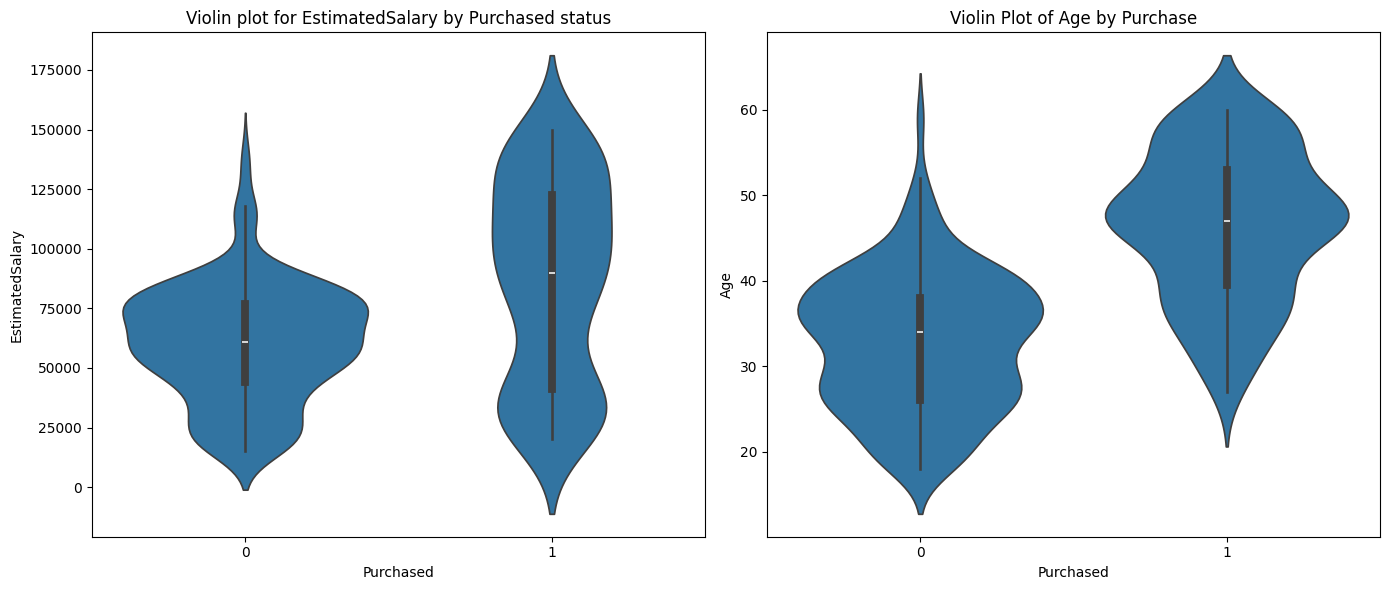

In [55]:
plt.figure(figsize=(14, 6))
# Violin plot for EstimatedSalary by Purchased status
plt.subplot(1,2,1)
sns.violinplot(x='Purchased',y='EstimatedSalary',data = df)
plt.title('Violin plot for EstimatedSalary by Purchased status')


# Violin plot for Age by Purchased status
plt.subplot(1, 2, 2)
sns.violinplot(x='Purchased', y='Age', data=df)
plt.title('Violin Plot of Age by Purchase')

plt.tight_layout()
plt.show()